<a href="https://colab.research.google.com/github/MrTG-CodeBot/Data-Analysis/blob/main/churn_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np

In [17]:
df=pd.read_csv('churn_data.csv')

df.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,530.0,two,157.0,3+,no,yes,no,sales,low
1,0.80,860.0,five,262.0,6+,no,yes,no,sales,medium
2,0.11,880.0,seven,272.0,4+,no,yes,no,sales,medium
3,0.72,870.0,five,223.0,5+,no,yes,no,sales,low
4,0.37,520.0,two,159.0,3+,no,yes,no,sales,low


In [18]:
df.describe()

,satisfaction,evaluation,average_montly_hours
count,14990.000000,14936.000000,14973.000000
mean,0.612817,716.085297,201.050424
std,0.248704,171.529563,49.986445
min,0.090000,360.000000,96.000000
25%,0.440000,560.000000,156.000000
50%,0.640000,720.000000,200.000000
75%,0.820000,870.000000,245.000000
max,1.000000,1000.000000,310.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   satisfaction          14990 non-null  float64
 1   evaluation            14936 non-null  float64
 2   number_of_projects    14955 non-null  object 
 3   average_montly_hours  14973 non-null  float64
 4   time_spend_company    14999 non-null  object 
 5   work_accident         14999 non-null  object 
 6   churn                 14999 non-null  object 
 7   promotion             14999 non-null  object 
 8   department            14958 non-null  object 
 9   salary                14999 non-null  object 
dtypes: float64(3), object(7)
memory usage: 1.1+ MB


In [20]:
df.isnull().sum()

,0
satisfaction,9
evaluation,63
number_of_projects,44
average_montly_hours,26
time_spend_company,0
work_accident,0
churn,0
promotion,0
department,41
salary,0


In [21]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop("churn", axis=1)
y = df["churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


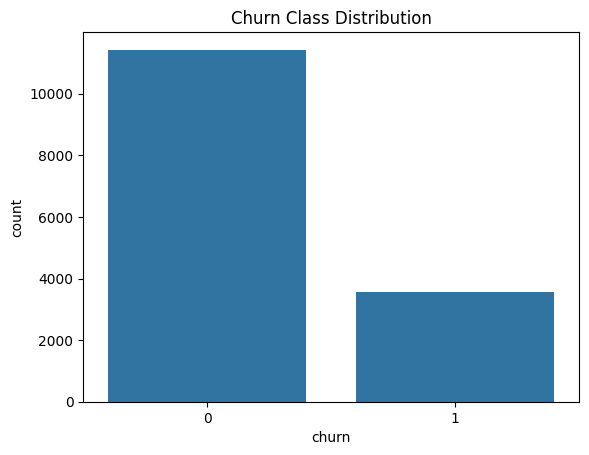

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=y)
plt.title("Churn Class Distribution")
plt.show()


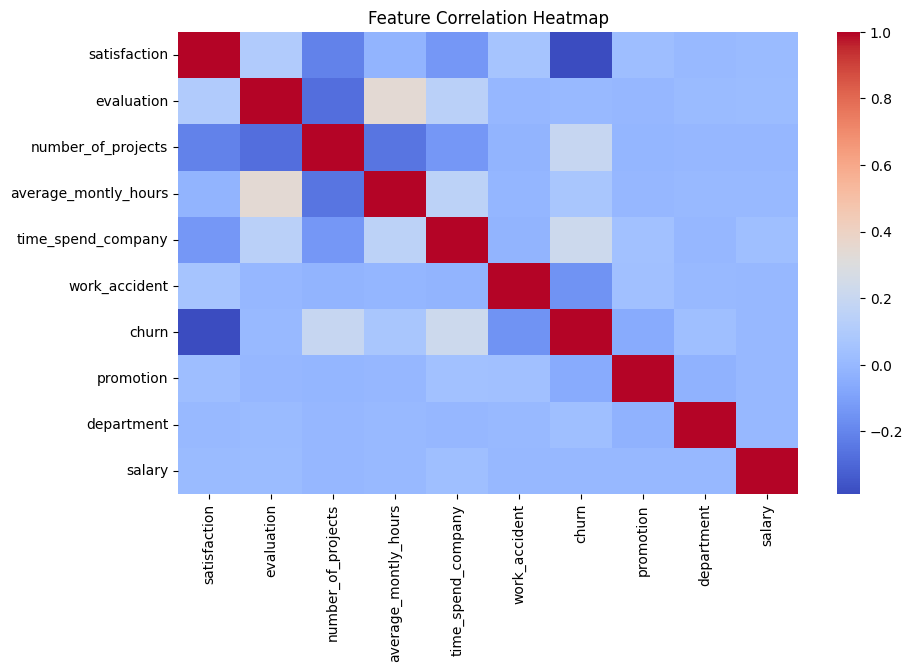

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}


In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results)
results_df


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.772000,0.542614,0.267507,0.358349
1,Decision Tree,0.979333,0.947802,0.966387,0.957004
2,Random Forest,0.990333,0.995658,0.963585,0.979359


In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20]
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    scoring="f1",
    cv=5
)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_


In [28]:
y_pred_best = best_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best))
print("Recall:", recall_score(y_test, y_pred_best))
print("F1 Score:", f1_score(y_test, y_pred_best))


Accuracy: 0.9903333333333333
Precision: 0.9956584659913169
Recall: 0.9635854341736695
F1 Score: 0.9793594306049822


In [29]:
sample = X_test[:5]
predictions = best_model.predict(sample)

predictions


array([0, 0, 0, 0, 0])